In [282]:
%matplotlib inline

import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from os import walk

# Etude PCA 

In [2]:
path = '/Users/mayliscotadze/Documents/Safran/'

In [283]:
# Load file all_datas avec toutes les lignes de tous les fichiers

In [3]:
df = pd.read_csv(path + 'all_datas.csv', sep=",", header=0, encoding="latin 1")

In [4]:
input = ["static pressure","air speed","rotation speed","outside temp","n2","n1","torque","turbine temp","oil pressure","oil temp","ground speed","altitude"]

In [5]:
df.head()

,Unnamed: 0,time,phase,static pressure,air speed,rotation speed,outside temp,n2,n1,torque,turbine temp,oil pressure,oil temp,fuel vol,fuel flow,power,ground speed,altitude,n_vol
0,0,06:26:30.000000,0,1012.4,0,0,28,0,0.0,2.3,33,0.0,27,99,58.2,22.1,0.0,26.0,0001-1.csv
1,1,06:26:32.000000,0,1012.4,0,0,28,0,0.7,2.3,33,0.0,27,99,44.5,NaN,0.0,25.0,0001-1.csv
2,2,06:26:34.000000,0,1012.4,0,0,28,0,7.3,2.3,38,0.0,27,99,32.1,NaN,0.0,24.0,0001-1.csv
3,3,06:26:36.000000,0,1012.5,0,0,28,0,12.8,2.3,130,0.0,27,99,20.8,NaN,0.0,24.0,0001-1.csv
4,4,06:26:39.000000,0,1012.4,0,0,28,0,17.3,2.3,291,0.0,27,99,21.3,NaN,0.0,25.0,0001-1.csv


## PCA sur les variables INPUT et sur la phase 1

In [6]:
def df_phase_input(df, input, phase):
    return df[df["phase"]==phase][input]

In [7]:
df_phase0_input = df_phase_input(df,input,0)

In [27]:
df_phase1_input = df_phase_input(df,input,1)

In [28]:
df_phase1_input.dtypes

static pressure    float64
air speed            int64
rotation speed       int64
outside temp         int64
n2                   int64
n1                 float64
torque             float64
turbine temp         int64
oil pressure       float64
oil temp             int64
ground speed       float64
altitude           float64
dtype: object

In [73]:
df_phase1_input = df_phase1_input.apply(lambda x : x.astype(float))

In [74]:
df_phase1_input.dtypes

static pressure    float64
air speed          float64
rotation speed     float64
outside temp       float64
n2                 float64
n1                 float64
torque             float64
turbine temp       float64
oil pressure       float64
oil temp           float64
ground speed       float64
altitude           float64
dtype: object

In [75]:
df.shape, df_phase0_input.shape, df_phase1_input.shape

((4619345, 19), (596933, 12), (4022412, 12))

# PCA PHASE 1

In [100]:
# Convert in numpy.array
array_1 = df_phase1_input.as_matrix()

In [101]:
array_1.shape

(4022412, 12)

In [46]:
from scipy import linalg
from sklearn.preprocessing import scale

In [102]:
np.where(np.isnan(array_1))

(array([30329]), array([11]))

In [103]:
array_1 = np.nan_to_num(array_1) # Replace the Nan value with zero

In [104]:
np.any(np.isnan(array_1)) , np.any(np.isinf(array_1))

(False, False)

In [107]:
# Recentring and rescaling data
array_1_scale = scale(array_1, axis=0)

In [130]:
# PCA de sklearn
from sklearn.decomposition import PCA

In [184]:
pca = PCA(n_components=6).fit(array_1_scale)
X_pca = pca.transform(array_1_scale)

In [185]:
print("Eigenvalues Phase 1")
print(pca.explained_variance_)  

### Eigenvalues ###
[ 5.93355698  2.52038573  1.67573401  0.83071135  0.53960805  0.25352257]


In [186]:
print("Explained variance ratio")
print (pca.explained_variance_ratio_)

### Explained variance ratio ###
[ 0.49446308  0.21003214  0.1396445   0.06922595  0.04496734  0.02112688]


In [187]:
print("Eigenvalues cumsum ")
print(pca.explained_variance_ratio_.cumsum())

### Eigenvalues cumsum ###
[ 0.49446308  0.70449523  0.84413973  0.91336567  0.95833301  0.97945989]


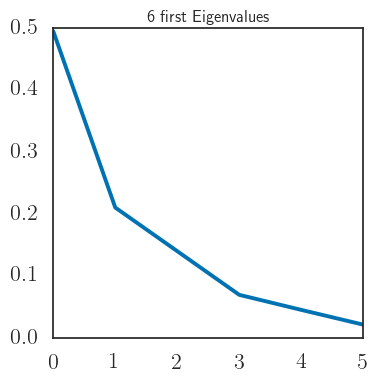

In [189]:
fig = plt.subplots(figsize=(4,4))
plt.plot(pca.explained_variance_ratio_)
plt.title('6 first Eigenvalues', fontsize = 12)


## First PCA Components interpretation

Interpretation of the principal components is based on finding which variables are most strongly correlated with each component, i.e., which of these numbers are large in magnitude, the farthest from zero in either positive or negative direction. 

In [192]:
pca_comp = pd.DataFrame(pca.components_)
pca_comp.columns = input

In [195]:
pca_comp2 = pca_comp.T

In [196]:
pca_comp2.columns = ['PC-1','PC-2','PC-3', 'PC-4', 'PC-5', 'PC-6']

In [197]:
pca_comp2

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
static pressure,0.159823,-0.550494,0.164036,-0.076446,0.163562,-0.242843
air speed,-0.281420,-0.018138,0.494150,-0.063960,-0.392277,-0.116470
rotation speed,-0.336635,-0.111075,-0.238144,-0.472510,-0.023604,-0.010750
outside temp,0.190866,-0.486495,0.034133,0.011391,-0.284633,0.716416
n2,-0.339452,-0.116781,-0.240718,-0.465227,0.013990,0.059760
n1,-0.376033,-0.150637,-0.209462,-0.022249,0.045974,0.133586
torque,-0.311514,-0.189369,-0.057173,0.593355,0.049755,-0.170235
turbine temp,-0.352879,-0.118979,-0.138846,0.416656,-0.113558,0.259012
oil pressure,-0.365092,-0.166177,-0.000685,0.075774,0.346336,-0.158519
oil temp,0.171559,-0.163419,-0.536456,0.072241,-0.634714,-0.440383


### First Principal Component Analysis - PCA1

In [211]:
pca1 = pca_comp2[['PC-1']]

In [212]:
pca1_sorted = pca1.abs().stack().sort_values(kind="quicksort", ascending = False)

In [217]:
print('Correlation entre la composante principale 1 et les inputs :\n')
print(pca1_sorted)

Correlation entre la composante principale 1 et les inputs :

n1               PC-1    0.376033
oil pressure     PC-1    0.365092
turbine temp     PC-1    0.352879
n2               PC-1    0.339452
rotation speed   PC-1    0.336635
torque           PC-1    0.311514
ground speed     PC-1    0.286068
air speed        PC-1    0.281420
outside temp     PC-1    0.190866
oil temp         PC-1    0.171559
static pressure  PC-1    0.159823
altitude         PC-1    0.150846
dtype: float64


### Second Principal Component Analysis - PCA2

In [216]:
pca2 = pca_comp2[['PC-2']]
pca2_sorted = pca2.abs().stack().sort_values(kind="quicksort", ascending = False)
print('Correlation entre la composante principale 2 et les inputs :\n')
print(pca2_sorted)

Correlation entre le composant principal 2 et les inputs :

altitude         PC-2    0.553304
static pressure  PC-2    0.550494
outside temp     PC-2    0.486495
torque           PC-2    0.189369
oil pressure     PC-2    0.166177
oil temp         PC-2    0.163419
n1               PC-2    0.150637
turbine temp     PC-2    0.118979
n2               PC-2    0.116781
rotation speed   PC-2    0.111075
ground speed     PC-2    0.028285
air speed        PC-2    0.018138
dtype: float64


### Third Principal Component Analysis - PCA3

In [218]:
pca3 = pca_comp2[['PC-3']]
pca3_sorted = pca3.abs().stack().sort_values(kind="quicksort", ascending = False)
print('Correlation entre la composante principale 3 et les inputs :\n')
print(pca3_sorted)

Correlation entre la composante principale 3 et les inputs :

oil temp         PC-3    0.536456
air speed        PC-3    0.494150
ground speed     PC-3    0.476404
n2               PC-3    0.240718
rotation speed   PC-3    0.238144
n1               PC-3    0.209462
altitude         PC-3    0.178653
static pressure  PC-3    0.164036
turbine temp     PC-3    0.138846
torque           PC-3    0.057173
outside temp     PC-3    0.034133
oil pressure     PC-3    0.000685
dtype: float64


In [280]:
def circleOfCorrelations(pc_infos):
    plt.figure(figsize=(5,5))
    plt.Circle((0,0),radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    for idx in range(len(pc_infos["PC-1"])):
        x = pc_infos["PC-1"][idx]
        y = pc_infos["PC-2"][idx]
        plt.plot([0.0,x],[0.0,y],'-', lw=1)
        plt.plot(x, y, 'kx')
        plt.annotate(pc_infos.index[idx], xy=(x,y), fontsize = 10, horizontalalignment='right',verticalalignment='top')
    plt.xlim((-1,1))
    plt.xlabel('PCA-1', fontsize = 12)
    plt.ylim((-1,1))
    plt.ylabel('PCA-2', fontsize = 12)
    plt.title("Circle of Correlations on PCA-1 and PCA-2", fontsize = 12)
    

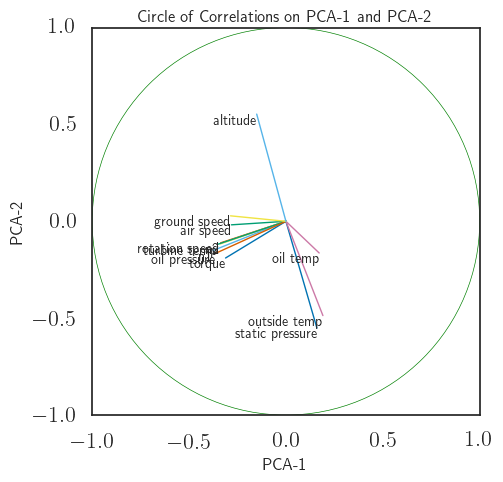

In [281]:
circleOfCorrelations(pca_comp2)

# PCA sur les variables input en Phase 0

In [284]:
array_0 = df_phase0_input.as_matrix()

In [285]:
np.where(np.isnan(array_1))

(array([], dtype=int64), array([], dtype=int64))

In [287]:
np.any(np.isnan(array_1)) , np.any(np.isinf(array_1))

(False, False)

In [289]:
array_0 = np.nan_to_num(array_0) 

In [296]:
# Recentring and rescaling data
array_0_scale = scale(array_0, axis=0)

In [297]:
pca0 = PCA(n_components=6).fit(array_0_scale)
X_pca0 = pca.transform(array_0_scale)

In [298]:
print("Eigenvalues Phase 0")
print(pca0.explained_variance_)  

Eigenvalues Phase 0
[ 4.91829861  1.78700512  1.27998981  1.02658157  0.99326677  0.90025181]


In [299]:
print("Explained variance ratio Phase 0")
print (pca0.explained_variance_ratio_)

Explained variance ratio Phase 0
[ 0.40985822  0.14891709  0.10666582  0.08554846  0.08277223  0.07502098]


In [300]:
print("Eigenvalues cumsum Phase 0")
print(pca0.explained_variance_ratio_.cumsum())

Eigenvalues cumsum Phase 0
[ 0.40985822  0.55877531  0.66544113  0.75098959  0.83376182  0.90878281]


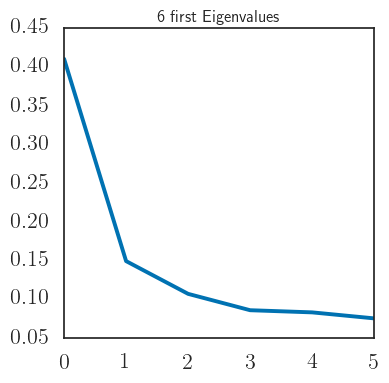

In [301]:
fig = plt.subplots(figsize=(4,4))
plt.plot(pca0.explained_variance_ratio_)
plt.title('6 first Eigenvalues', fontsize = 12)


In [303]:
pca_comp0 = pd.DataFrame(pca0.components_)
pca_comp0.columns = input

In [304]:
pca_comp02 = pca_comp0.T

In [305]:
pca_comp02.columns = ['PC-1','PC-2','PC-3', 'PC-4', 'PC-5', 'PC-6']

In [306]:
pca01 = pca_comp02[['PC-1']]

In [307]:
pca01_sorted = pca01.abs().stack().sort_values(kind="quicksort", ascending = False)
print('Correlation entre la composante principale 1 et les inputs en phase 0 :\n')
print(pca01_sorted)

Correlation entre la composante principale 1 et les inputs en phase 0 :

n1               PC-1    0.436998
n2               PC-1    0.435675
oil pressure     PC-1    0.417053
rotation speed   PC-1    0.414529
turbine temp     PC-1    0.380001
torque           PC-1    0.349448
oil temp         PC-1    0.071801
air speed        PC-1    0.029102
ground speed     PC-1    0.028475
static pressure  PC-1    0.010820
altitude         PC-1    0.002483
outside temp     PC-1    0.001494
dtype: float64


In [308]:
pca02 = pca_comp02[['PC-2']]
pca02_sorted = pca02.abs().stack().sort_values(kind="quicksort", ascending = False)
print('Correlation entre la composante principale 2 et les inputs en phase 0:\n')
print(pca02_sorted)

Correlation entre la composante principale 2 et les inputs en phase 0:

altitude         PC-2    0.708394
static pressure  PC-2    0.702470
air speed        PC-2    0.049590
outside temp     PC-2    0.032566
oil temp         PC-2    0.026942
torque           PC-2    0.014729
ground speed     PC-2    0.008677
oil pressure     PC-2    0.008017
rotation speed   PC-2    0.007711
turbine temp     PC-2    0.004878
n1               PC-2    0.004633
n2               PC-2    0.002625
dtype: float64


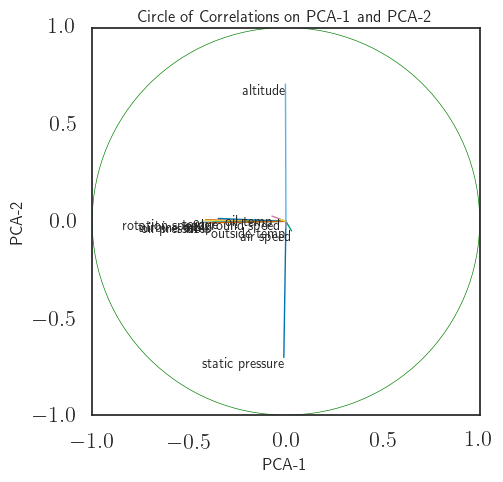

In [309]:
circleOfCorrelations(pca_comp02)